In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Flight_Prices.xlsx")

In [3]:
df.head()

,Unnamed: 0,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
0,0,Go First,15:00,17:00,2h 00m,New Delhi,Mumbai,eCash 250,Non Stop,"7,320"
1,1,Air India,18:00,20:00,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
2,2,Air India,07:00,09:05,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
3,3,Vistara,21:50,23:55,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
4,4,Air Asia,04:25,06:35,2h 10m,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,"7,320"


# Exploratory Data Analysis (EDA):

In [4]:
df.shape

(3542, 10)

In [5]:
df.dtypes

Unnamed: 0            int64
Airline              object
Departure_Time       object
Arrival_Time         object
Duration             object
Source               object
Destination          object
Meal_availability    object
Total_Stops          object
Price                object
dtype: object

In [6]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Departure_Time', 'Arrival_Time', 'Duration',
       'Source', 'Destination', 'Meal_availability', 'Total_Stops', 'Price'],
      dtype='object')

In [7]:
#checking for Null Values
df.isnull().sum()

Unnamed: 0           0
Airline              0
Departure_Time       0
Arrival_Time         0
Duration             0
Source               0
Destination          0
Meal_availability    0
Total_Stops          0
Price                0
dtype: int64

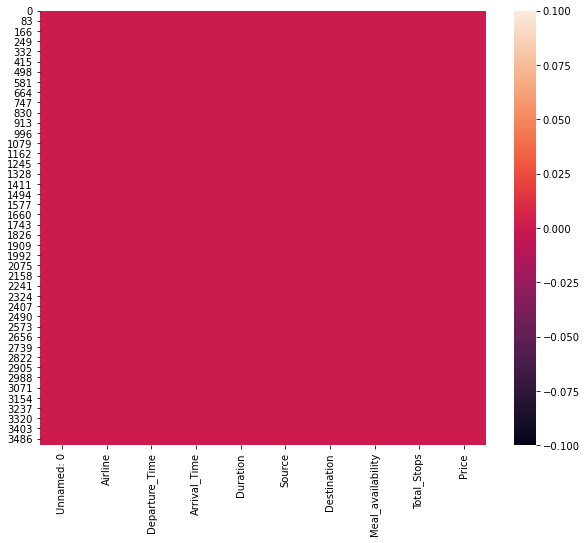

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())
plt.show()

###  No NULL values prrsent in Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542 entries, 0 to 3541
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3542 non-null   int64 
 1   Airline            3542 non-null   object
 2   Departure_Time     3542 non-null   object
 3   Arrival_Time       3542 non-null   object
 4   Duration           3542 non-null   object
 5   Source             3542 non-null   object
 6   Destination        3542 non-null   object
 7   Meal_availability  3542 non-null   object
 8   Total_Stops        3542 non-null   object
 9   Price              3542 non-null   object
dtypes: int64(1), object(9)
memory usage: 276.8+ KB


In [10]:
#droppping unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
0,Go First,15:00,17:00,2h 00m,New Delhi,Mumbai,eCash 250,Non Stop,"7,320"
1,Air India,18:00,20:00,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
2,Air India,07:00,09:05,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
3,Vistara,21:50,23:55,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,"7,320"
4,Air Asia,04:25,06:35,2h 10m,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,"7,320"


In [12]:
df.nunique()

Airline                 7
Departure_Time        260
Arrival_Time          259
Duration              348
Source                  9
Destination            10
Meal_availability      11
Total_Stops             5
Price                1161
dtype: int64

In [13]:
df.describe()

,Airline,Departure_Time,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price
count,3542,3542,3542,3542,3542,3542,3542,3542,3542
unique,7,260,259,348,9,10,11,5,1161
top,IndiGo,07:00,14:50,2h 10m,Chennai,New Delhi,eCash 250,1 Stop,"7,854"
freq,1487,59,76,65,528,515,2218,2511,120


# Analyzing Target Variable:

In [14]:
df['Price'].unique()

array(['7,320', '8,160', '8,370', ..., '10,450', '10,677', '11,169'],
      dtype=object)

In [15]:
df['Price'].value_counts()

7,854     120
7,320     104
7,308      93
8,160      75
6,333      66
         ... 
17,205      1
9,536       1
30,114      1
11,437      1
5,672       1
Name: Price, Length: 1161, dtype: int64

### 'Price'                Let's replace this sign by empty space and convert the type into float.

In [16]:
# Let's replace "," sign by empty space
df['Price'] = df['Price'].str.replace(',','')

In [17]:
# Let's convert data type of Price column to float
df['Price'] = df['Price'].astype('float')

In [18]:
df['Price'].unique()

array([ 7320.,  8160.,  8370., ..., 10450., 10677., 11169.])

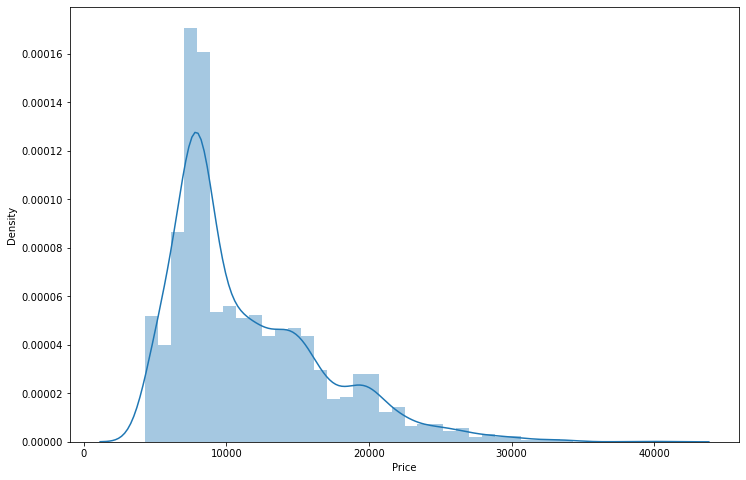

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(df['Price'])
plt.show()

# Analayzing Feature columns:

In [20]:
df['Departure_Time'].unique()

array(['15:00', '18:00', '07:00', '21:50', '04:25', '05:45', '06:30',
       '07:15', '08:00', '08:10', '10:40', '11:15', '12:00', '12:50',
       '14:20', '15:30', '17:15', '18:40', '18:55', '22:30', '23:35',
       '07:20', '09:00', '10:20', '02:15', '04:50', '04:55', '09:25',
       '09:40', '14:15', '16:35', '19:55', '21:20', '22:55', '05:55',
       '23:10', '13:25', '20:40', '09:30', '17:25', '20:50', '07:55',
       '06:45', '08:55', '12:55', '05:25', '06:10', '08:05', '09:05',
       '16:05', '09:35', '20:45', '04:15', '08:20', '09:15', '12:30',
       '18:20', '21:15', '21:25', '22:50', '10:50', '13:50', '23:05',
       '12:45', '21:00', '08:30', '19:00', '19:45', '21:45', '07:25',
       '06:05', '20:30', '05:10', '11:00', '18:30', '05:15', '13:40',
       '05:30', '15:45', '13:45', '12:35', '12:40', '07:50', '10:25',
       '23:25', '17:45', '16:15', '19:30', '07:30', '14:45', '17:40',
       '20:35', '12:20', '11:40', '08:50', '16:45', '17:10', '13:00',
       '16:00', '10:

### Departure time is when a plane leaves the gate.

### "Departure_Time" is a object data type. therefore, we have to convert this datatype into timestamp(datetime).

In [21]:
# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

In [22]:
# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Departure_Time"]).dt.minute

In [23]:
# now dropping
df.drop(["Departure_Time"], axis = 1, inplace = True)

In [24]:
df.head()

,Airline,Arrival_Time,Duration,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min
0,Go First,17:00,2h 00m,New Delhi,Mumbai,eCash 250,Non Stop,7320.0,15,0
1,Air India,20:00,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,18,0
2,Air India,09:05,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,7,0
3,Vistara,23:55,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,21,50
4,Air Asia,06:35,2h 10m,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,7320.0,4,25


In [25]:
df['Arrival_Time'].unique()

array(['17:00', '20:00', '09:05', '23:55', '06:35', '07:55', '08:40',
       '09:10', '09:25', '10:10', '10:20', '12:50', '13:25', '14:10',
       '15:00', '16:30', '17:40', '19:25', '20:50', '21:05', '00:40',
       '01:45', '09:35', '11:15', '12:35', '04:20', '06:55', '07:00',
       '11:30', '11:45', '16:20', '18:40', '22:00', '23:25', '01:00',
       '08:05', '01:20', '15:40', '22:55', '11:50', '02:00', '14:55',
       '01:15', '17:25', '23:05', '08:50', '10:40', '20:40', '08:55',
       '10:50', '18:50', '21:25', '12:25', '23:35', '07:10', '12:10',
       '15:25', '21:15', '22:50', '00:10', '00:20', '18:30', '15:10',
       '19:00', '01:55', '13:45', '07:45', '08:30', '21:20', '00:25',
       '23:20', '10:05', '15:05', '13:10', '09:00', '11:55', '20:45',
       '07:40', '17:35', '11:00', '15:35', '12:40', '17:45', '15:15',
       '01:35', '20:05', '21:50', '09:40', '19:55', '23:30', '06:45',
       '20:55', '12:15', '07:50', '17:30', '00:05', '23:10', '02:55',
       '23:00', '18:

### Arrival time is when a plane leaves the gate.

### "Arrival_Time" is a object data type. therefore, we have to convert this datatype into timestamp(datetime).


In [26]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [27]:
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [28]:
# now dropping
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [29]:
df.head()

,Airline,Duration,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Go First,2h 00m,New Delhi,Mumbai,eCash 250,Non Stop,7320.0,15,0,17,0
1,Air India,2h 00m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,18,0,20,0
2,Air India,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,7,0,9,5
3,Vistara,2h 05m,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,21,50,23,55
4,Air Asia,2h 10m,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,7320.0,4,25,6,35


# "Duration"

In [30]:
duration = list(df["Duration"])

In [31]:
duration

['2h 00m',
 '2h 00m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 15m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 05m',
 '2h 10m',
 '2h 10m',
 '2h 15m',
 '2h 15m',
 '2h 20m',
 '2h 35m',
 '5h 10m',
 '5h 15m',
 '6h 40m',
 '7h 00m',
 '7h 15m',
 '8h 10m',
 '8h 30m',
 '8h 35m',
 '10h 10m',
 '2h 40m',
 '2h 40m',
 '2h 40m',
 '2h 40m',
 '2h 45m',
 '2h 45m',
 '2h 45m',
 '2h 45m',
 '2h 45m',
 '2h 45m',
 '2h 50m',
 '2h 50m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '2h 55m',
 '3h 00m',
 '4h 20m',
 '5h 10m',
 '2h 50m',
 '2h 55m',
 '2h 55m',
 '5h 45m',
 '7h 50m',
 '9h 10m',
 '9h 15m',
 '9h 25m',
 '10h 45m',
 '11h 00m',
 '11h 45m',
 '13h 30m',
 '13h 30m',
 '14h 30m',
 '25h 35m',
 '

In [32]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:   
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [33]:
#creating 
Duration_hours = []
Duration_mins = []

In [34]:
for i in range(len(duration)):
    Duration_hours.append(int(duration[i].split(sep = "h")[0])) 
    Duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [35]:
# Adding duration_hours and duration_mins list to train_data dataframe
df['Duration_hours'] = Duration_hours
df['Duration_min'] = Duration_mins

In [36]:
#now dropping
df.drop('Duration', axis=1, inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,Go First,New Delhi,Mumbai,eCash 250,Non Stop,7320.0,15,0,17,0,2,0
1,Air India,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,18,0,20,0,2,0
2,Air India,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,7,0,9,5,2,5
3,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,21,50,23,55,2,5
4,Air Asia,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,7320.0,4,25,6,35,2,10


In [38]:
df['Meal_availability'].unique()

array(['eCash 250', 'Free Meal', 'Emissions: 140 Kg CO2',
       'Emissions: 142 Kg CO2', 'Emissions: 191 Kg CO2',
       'Emissions: 185 Kg CO2', 'Emissions: 303 Kg CO2',
       'Emissions: 109 Kg CO2', 'Emissions: 112 Kg CO2',
       'Emissions: 331 Kg CO2', 'No Meal Fare'], dtype=object)

In [39]:
df['Meal_availability'].value_counts()

eCash 250                2218
Free Meal                1277
Emissions: 185 Kg CO2      13
Emissions: 142 Kg CO2       9
Emissions: 191 Kg CO2       6
Emissions: 303 Kg CO2       4
Emissions: 331 Kg CO2       4
Emissions: 140 Kg CO2       3
Emissions: 109 Kg CO2       3
No Meal Fare                3
Emissions: 112 Kg CO2       2
Name: Meal_availability, dtype: int64

####  we can observe "eCash 250" entry which does not belongs to meals so we can replace it as "None"

In [40]:
df['Meal_availability'] = df['Meal_availability'].replace('eCash 250','None')

#### "No meal fare" and "Free meal" belongs to same category that is they give same meaning so we can group them as well.

In [41]:
df['Meal_availability'] = df['Meal_availability'].replace('No Meal Fare','Free Meal')

In [42]:
df['Airline'].unique()

array(['Go First', 'Air India', 'Vistara', 'Air Asia', 'IndiGo',
       'SpiceJet', 'StarAir'], dtype=object)

In [43]:
df['Airline'].value_counts()

IndiGo       1487
Air India     626
Vistara       612
Go First      410
Air Asia      266
SpiceJet      138
StarAir         3
Name: Airline, dtype: int64

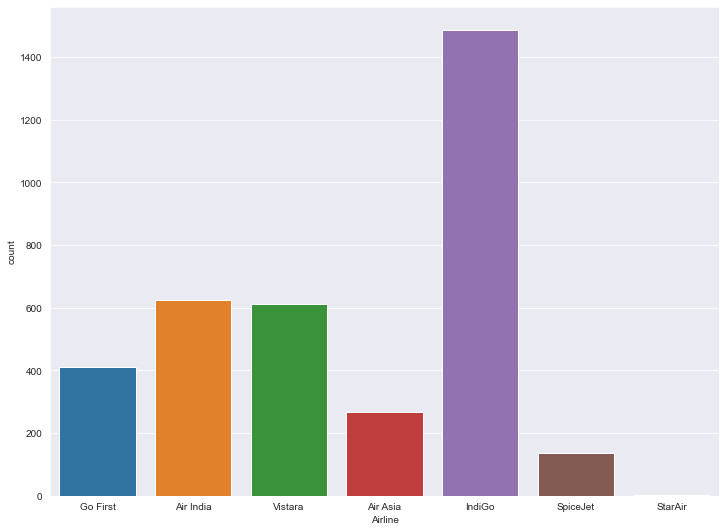

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,9))
sns.countplot(df['Airline'])
plt.show()

## Observation:-
    
    1.Indigo has largest share in market followed by AirIndia and Vistara

In [45]:
df['Source'].unique()

array(['New Delhi', 'Mumbai', 'Pune', 'Bangalore', 'Chennai', 'Hyderabad',
       'Goa', 'Kolkata', 'Jaipur'], dtype=object)

In [46]:
df['Source'].value_counts()

Chennai      528
Mumbai       514
Kolkata      474
Hyderabad    396
Bangalore    381
New Delhi    372
Pune         331
Goa          325
Jaipur       221
Name: Source, dtype: int64

In [47]:
df['Source'].value_counts()

Chennai      528
Mumbai       514
Kolkata      474
Hyderabad    396
Bangalore    381
New Delhi    372
Pune         331
Goa          325
Jaipur       221
Name: Source, dtype: int64

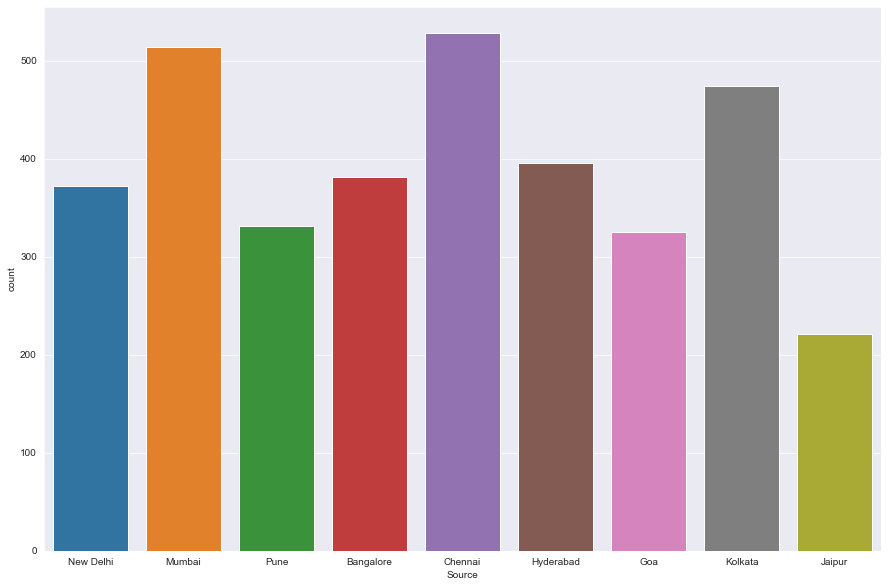

In [48]:
plt.figure(figsize=(15,10))
sns.countplot(df['Source'])
plt.show()

### Source vs Price

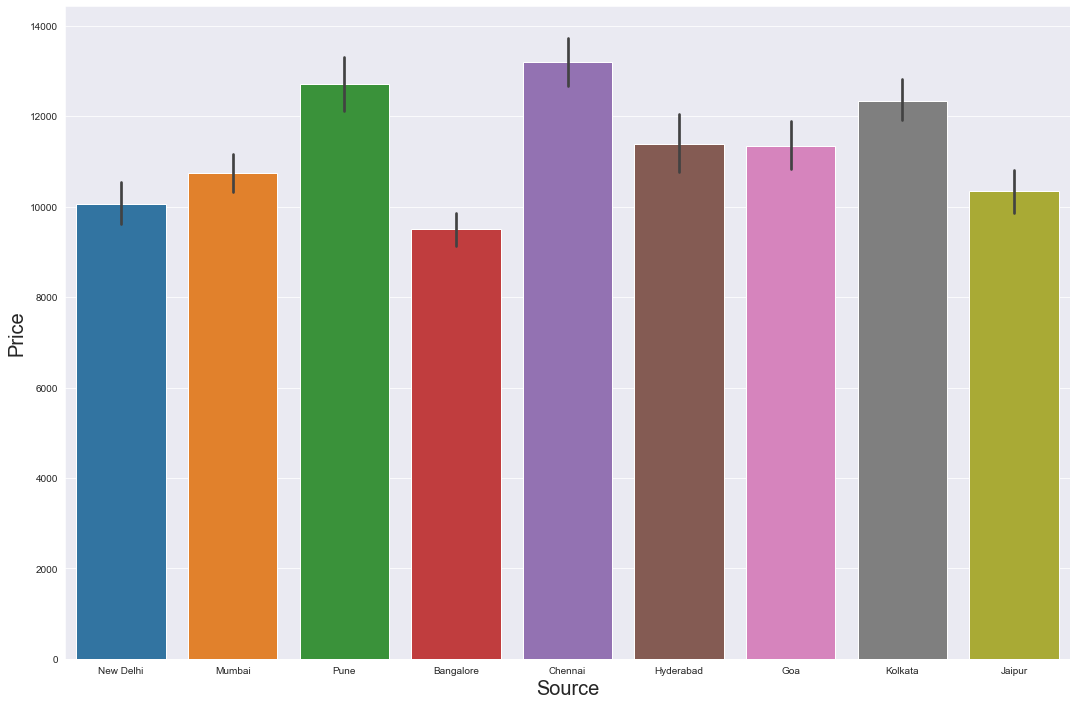

In [49]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Source',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Source',fontsize=20)
plt.show()

## "Airline" vs "Price"

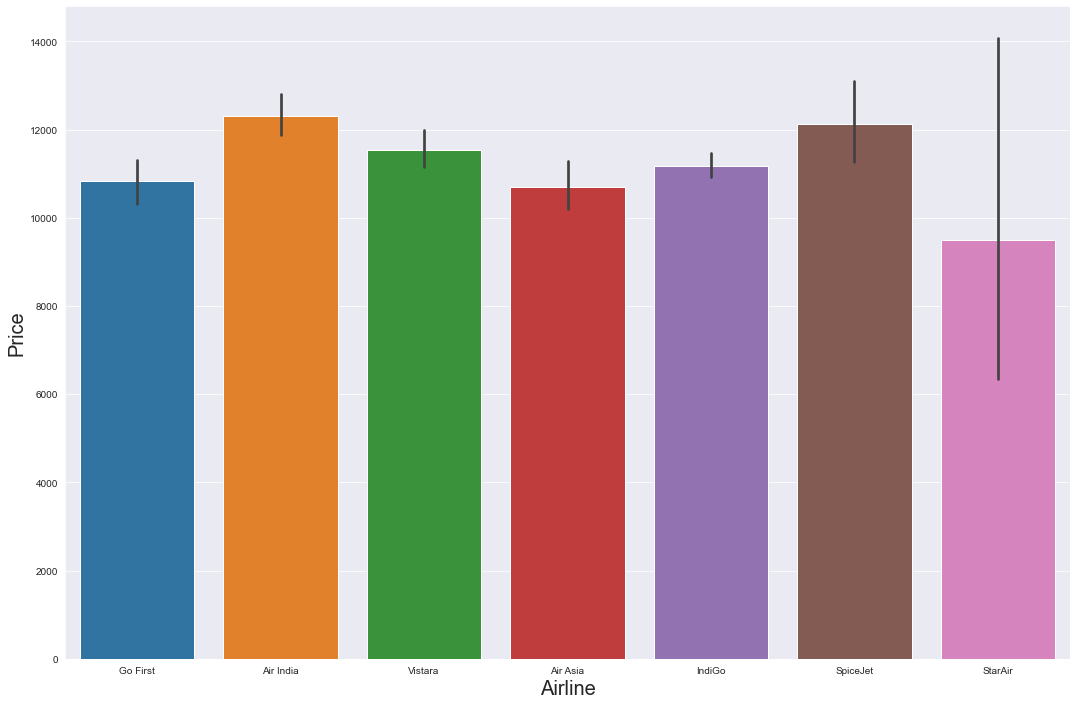

In [50]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Airline',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Airline',fontsize=20)
plt.show()

## "Destintaion" vs "Price"

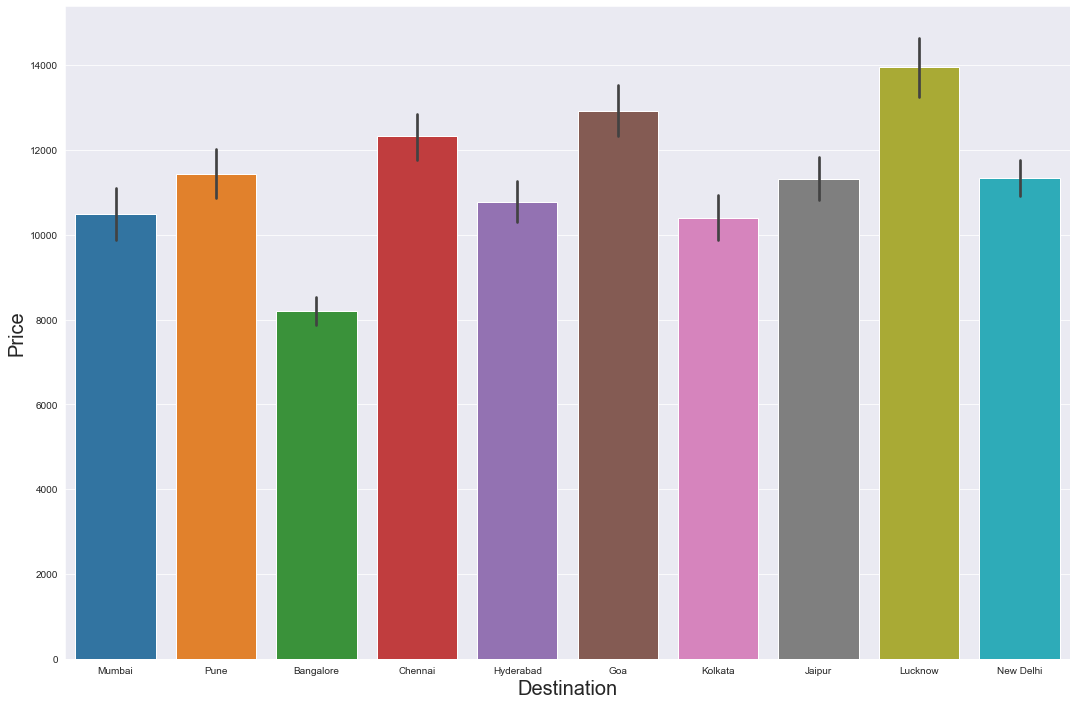

In [51]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Destination',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Destination',fontsize=20)
plt.show()

## "Total_Stops" vs "Price"

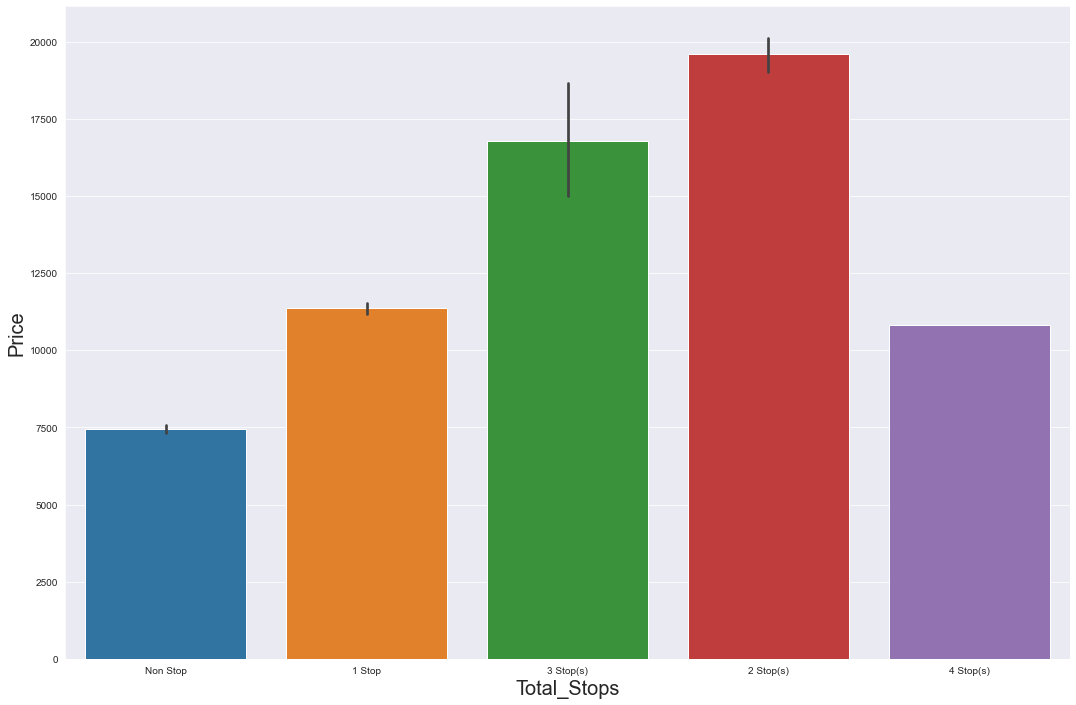

In [52]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Total_Stops',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Total_Stops',fontsize=20)
plt.show()

## "Dep_hour" vs "Price"

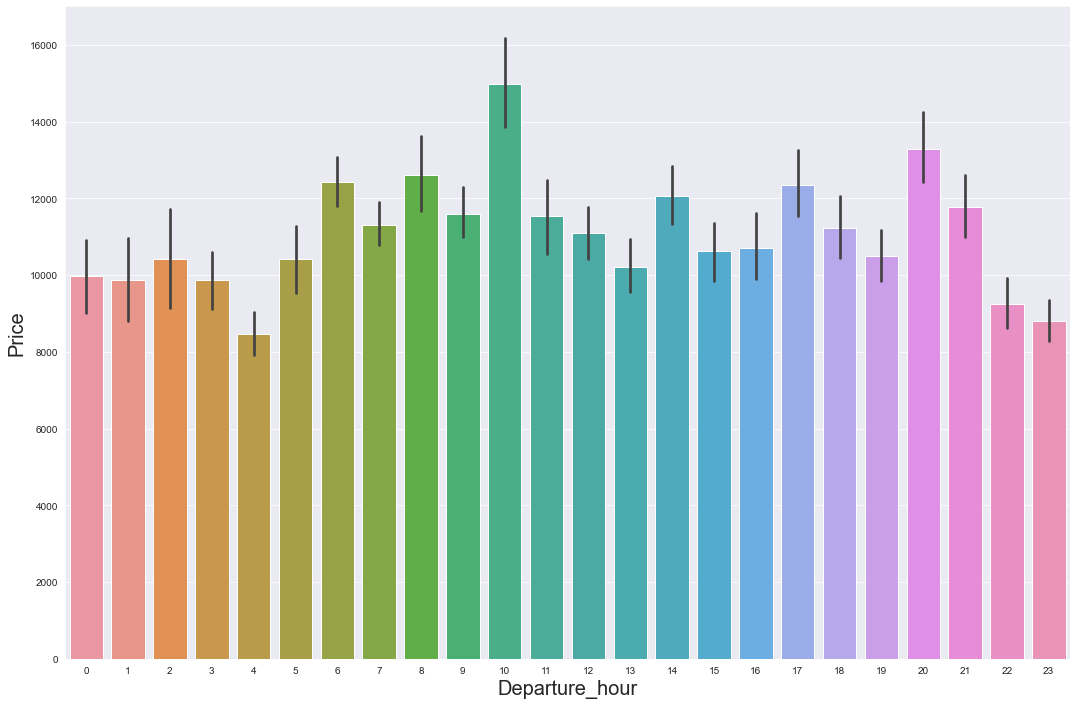

In [53]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Dep_hour',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Departure_hour',fontsize=20)
plt.show()

# Observation:-

1."Departure_Hour vs Price": From the bar plot and line plot we can see that there are some flights departing in the early morning 10 AM having most expensive ticket prices compared to late morning flights. We can also observe the flight ticket prices are higher during evening (may fluctuate) and it decreases in the late night.

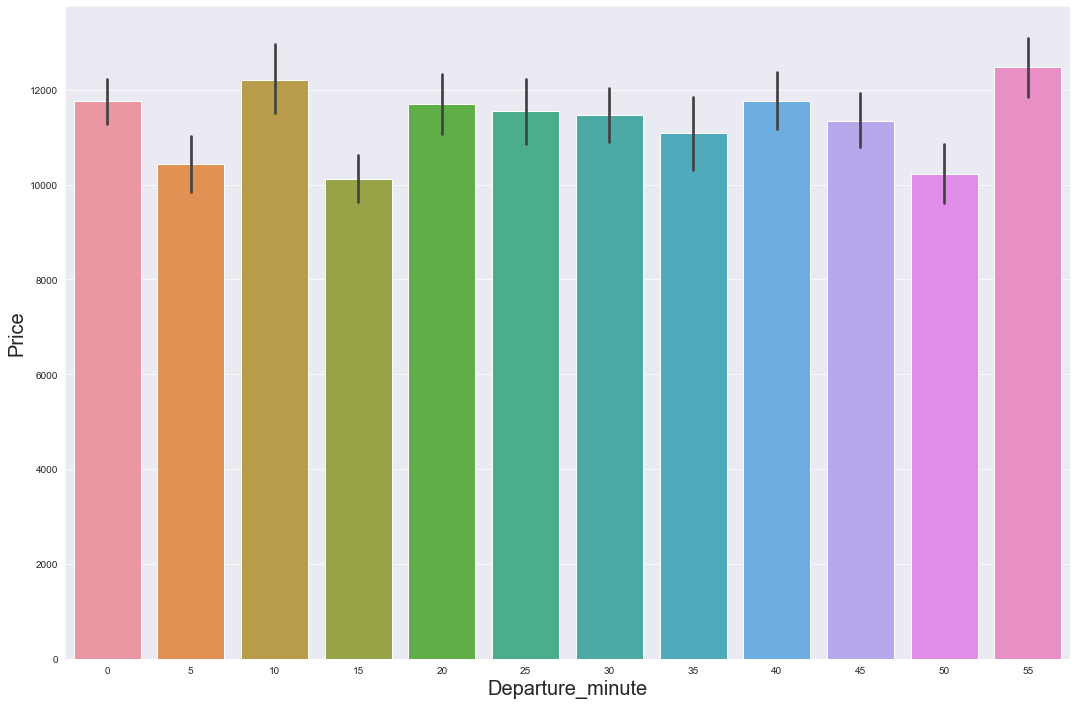

In [54]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Dep_min',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Departure_minute',fontsize=20)
plt.show()

## "Arrival_hour" vs "Price"

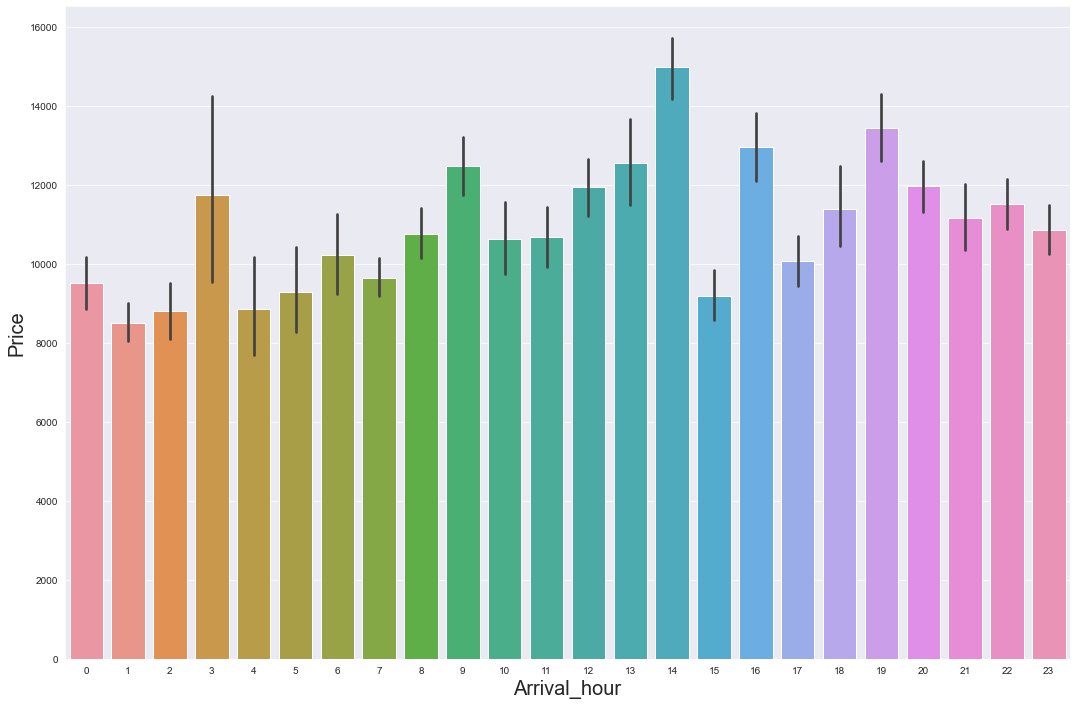

In [55]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Arrival_hour',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Arrival_hour',fontsize=20)
plt.show()

## "Duration_hour" vs "Price"

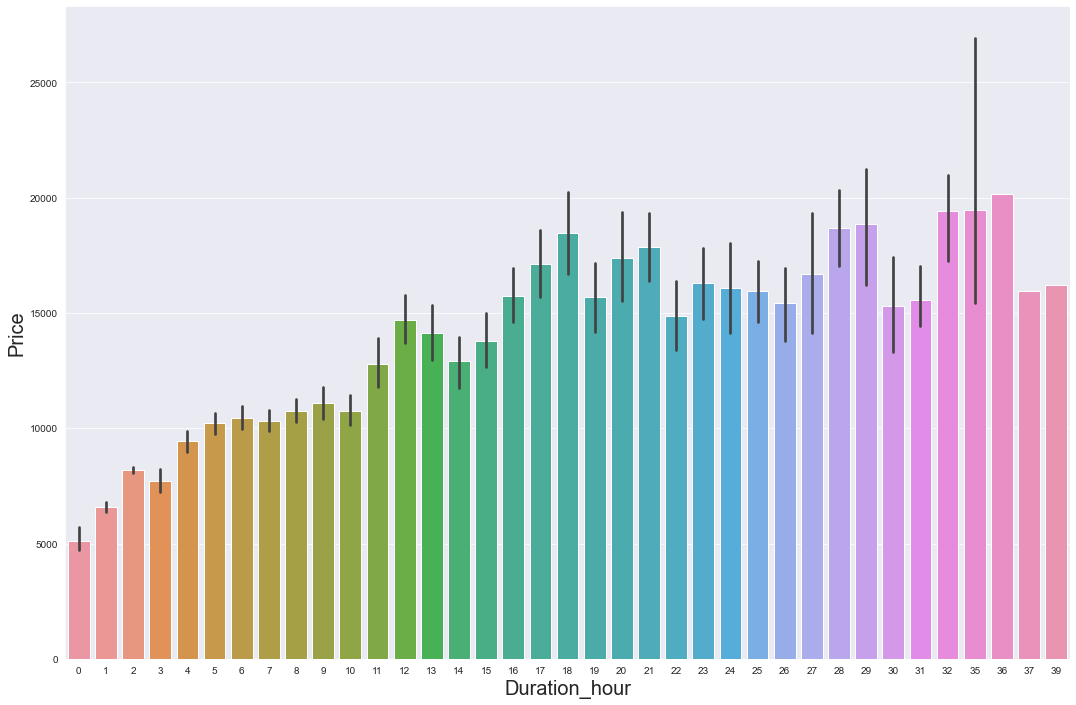

In [56]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Duration_hours',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration_hour',fontsize=20)
plt.show()

# Observation:-

"Duration_hour vs Price": From the reg plot we can observe some positive linear relation between Duration and Price. Flights having 1-12 hours of duration, they have ticket price of around 15000.

## "Duration_min" vs "Price"

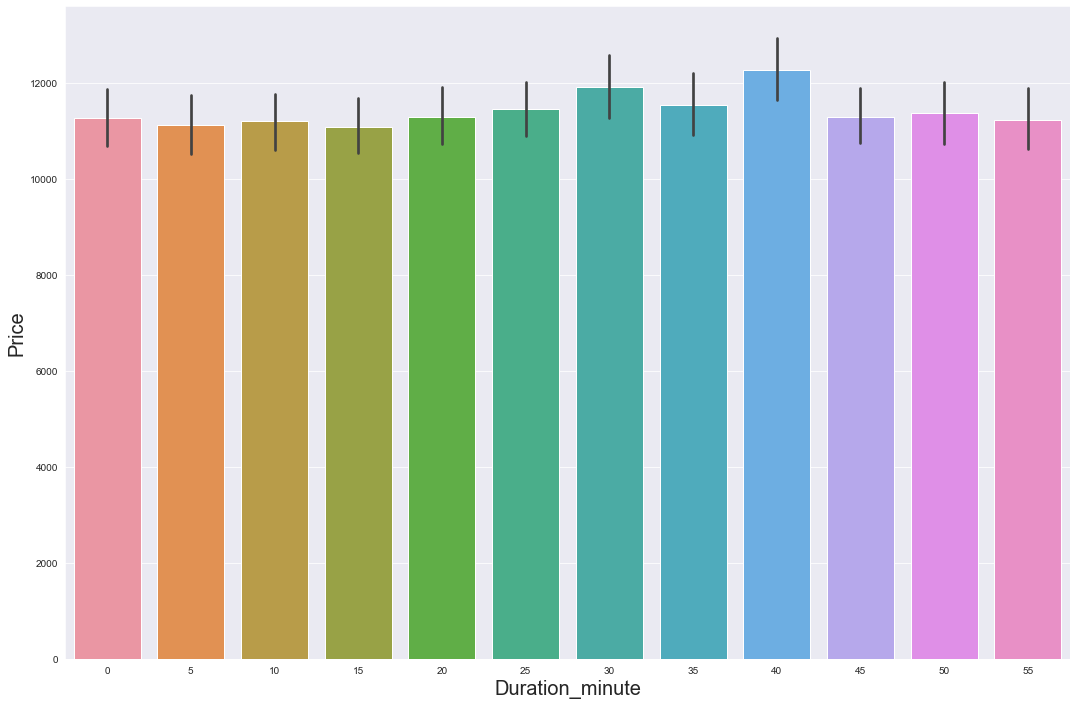

In [57]:
plt.figure(figsize=(18,12))
sns.barplot(x = 'Duration_min',y = 'Price', data = df)
plt.ylabel('Price',fontsize=20)
plt.xlabel('Duration_minute',fontsize=20)
plt.show()

# "Destination"

In [58]:
df['Destination'].unique()

array(['Mumbai', 'Pune', 'Bangalore', 'Chennai', 'Hyderabad', 'Goa',
       'Kolkata', 'Jaipur', 'Lucknow', 'New Delhi'], dtype=object)

In [59]:
df['Destination'].value_counts()

New Delhi    515
Hyderabad    412
Chennai      378
Goa          356
Lucknow      355
Mumbai       344
Jaipur       338
Kolkata      303
Pune         271
Bangalore    270
Name: Destination, dtype: int64

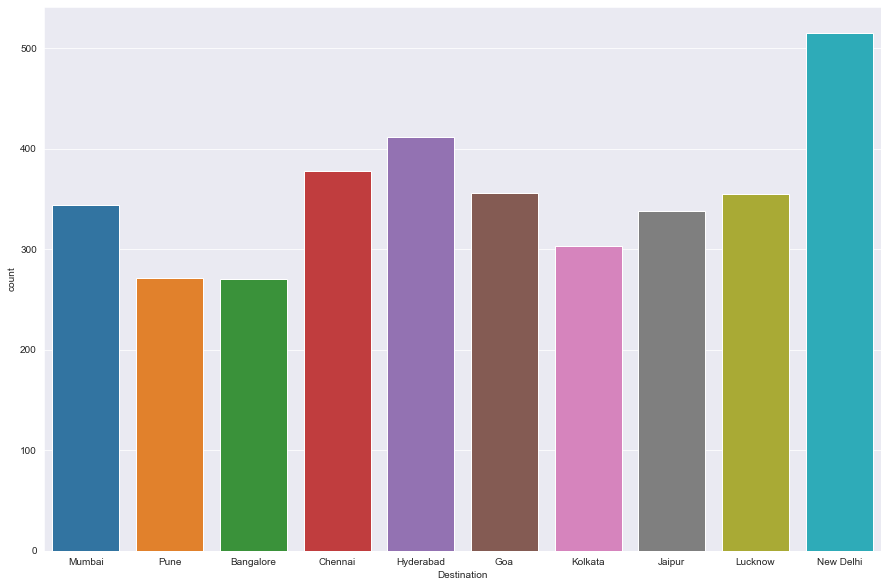

In [60]:
plt.figure(figsize=(15,10))
sns.countplot(df['Destination'])
plt.show()

In [61]:
df["Total_Stops"].value_counts()

1 Stop       2511
Non Stop      678
2 Stop(s)     324
3 Stop(s)      28
4 Stop(s)       1
Name: Total_Stops, dtype: int64

### Assigning each value to Total_stops

In [62]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

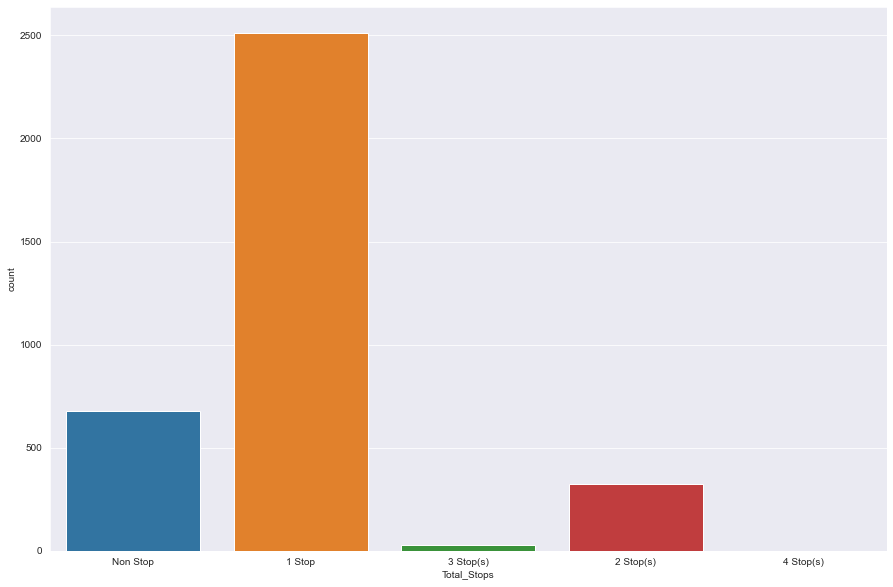

In [63]:
plt.figure(figsize=(15,10))
sns.countplot(df['Total_Stops'])
plt.show()

In [64]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,Go First,New Delhi,Mumbai,None,Non Stop,7320.0,15,0,17,0,2,0
1,Air India,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,18,0,20,0,2,0
2,Air India,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,7,0,9,5,2,5
3,Vistara,New Delhi,Mumbai,Free Meal,Non Stop,7320.0,21,50,23,55,2,5
4,Air Asia,New Delhi,Mumbai,Emissions: 140 Kg CO2,Non Stop,7320.0,4,25,6,35,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,Air India,Jaipur,Goa,None,1 Stop,10907.0,8,40,17,20,8,40
3538,Air India,Jaipur,Goa,None,1 Stop,10907.0,14,15,23,0,8,45
3539,Air India,Jaipur,Goa,None,1 Stop,10907.0,6,20,15,15,8,55
3540,Air India,Jaipur,Goa,None,1 Stop,10907.0,4,50,13,55,9,5


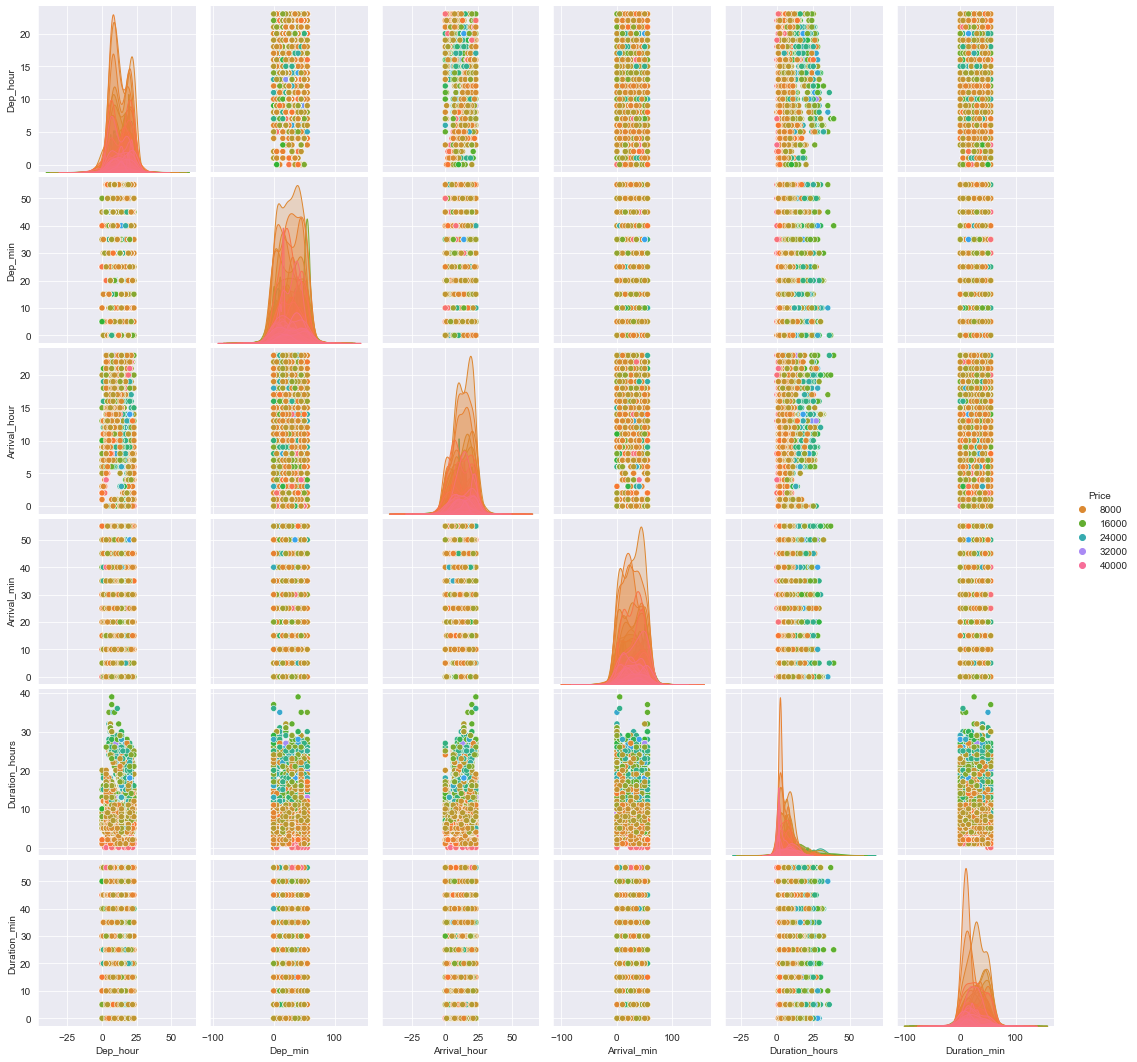

In [65]:
sns.pairplot(df,hue="Price",palette="husl")
plt.show()

# Label Encoding:

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
df['Airline'] = le.fit_transform(df['Airline'])

In [68]:
df['Source'] = le.fit_transform(df['Source'])

In [69]:
df['Destination'] = le.fit_transform(df['Destination'])

In [70]:
df['Total_Stops'] = le.fit_transform(df['Total_Stops'])

In [71]:
df['Meal_availability'] = le.fit_transform(df['Meal_availability'])

In [72]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,2,7,7,9,4,7320.0,15,0,17,0,2,0
1,1,7,7,8,4,7320.0,18,0,20,0,2,0
2,1,7,7,8,4,7320.0,7,0,9,5,2,5
3,6,7,7,8,4,7320.0,21,50,23,55,2,5
4,0,7,7,2,4,7320.0,4,25,6,35,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,1,4,2,9,0,10907.0,8,40,17,20,8,40
3538,1,4,2,9,0,10907.0,14,15,23,0,8,45
3539,1,4,2,9,0,10907.0,6,20,15,15,8,55
3540,1,4,2,9,0,10907.0,4,50,13,55,9,5


# Correlation:

In [73]:
df.corr()

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
Airline,1.000000,-0.109967,0.101812,-0.006549,0.001387,0.000180,-0.025208,0.003889,0.022819,0.039168,-0.008040,0.007243
Source,-0.109967,1.000000,-0.063984,0.007024,0.063513,0.002077,-0.006677,0.042675,-0.044944,-0.019386,-0.049068,-0.030957
Destination,0.101812,-0.063984,1.000000,-0.005013,-0.011209,0.038502,0.022752,-0.040021,-0.058395,-0.001246,-0.055953,-0.026923
Meal_availability,-0.006549,0.007024,-0.005013,1.000000,-0.110385,-0.343213,-0.021767,0.004812,-0.023645,-0.012749,-0.253279,-0.021313
Total_Stops,0.001387,0.063513,-0.011209,-0.110385,1.000000,-0.262550,0.021317,0.023306,-0.058804,-0.017349,-0.459128,-0.070451
Price,0.000180,0.002077,0.038502,-0.343213,-0.262550,1.000000,-0.029157,0.015341,0.112932,0.052089,0.531034,0.024383
Dep_hour,-0.025208,-0.006677,0.022752,-0.021767,0.021317,-0.029157,1.000000,0.045049,-0.106125,-0.008007,0.029458,-0.043696
Dep_min,0.003889,0.042675,-0.040021,0.004812,0.023306,0.015341,0.045049,1.000000,0.014369,0.006038,-0.008778,-0.077871
Arrival_hour,0.022819,-0.044944,-0.058395,-0.023645,-0.058804,0.112932,-0.106125,0.014369,1.000000,-0.018263,0.026963,0.004227
Arrival_min,0.039168,-0.019386,-0.001246,-0.012749,-0.017349,0.052089,-0.008007,0.006038,-0.018263,1.000000,-0.036914,0.029895


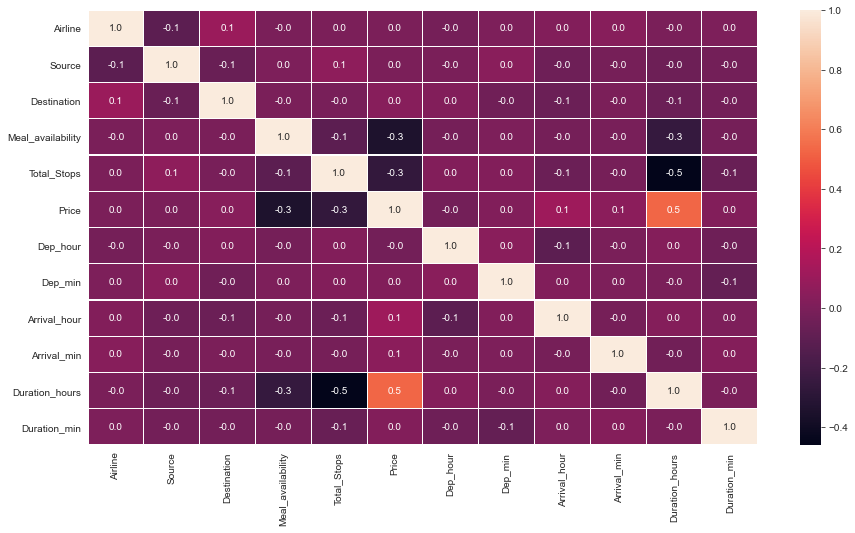

In [74]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Checking for Outliers:

In [75]:
X = df.drop(columns = ['Price'])
y = df['Price']

In [76]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,2,7,7,9,4,7320.0,15,0,17,0,2,0
1,1,7,7,8,4,7320.0,18,0,20,0,2,0
2,1,7,7,8,4,7320.0,7,0,9,5,2,5
3,6,7,7,8,4,7320.0,21,50,23,55,2,5
4,0,7,7,2,4,7320.0,4,25,6,35,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,1,4,2,9,0,10907.0,8,40,17,20,8,40
3538,1,4,2,9,0,10907.0,14,15,23,0,8,45
3539,1,4,2,9,0,10907.0,6,20,15,15,8,55
3540,1,4,2,9,0,10907.0,4,50,13,55,9,5


<AxesSubplot:xlabel='Airline'>

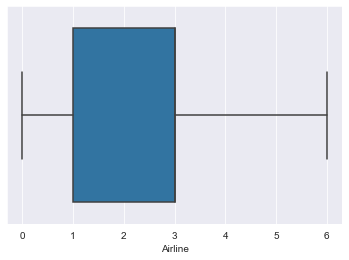

In [77]:
sns.boxplot(df['Airline'])

<AxesSubplot:xlabel='Source'>

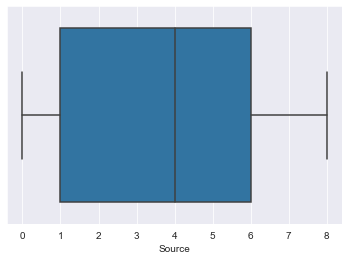

In [78]:
sns.boxplot(df['Source'])

<AxesSubplot:xlabel='Destination'>

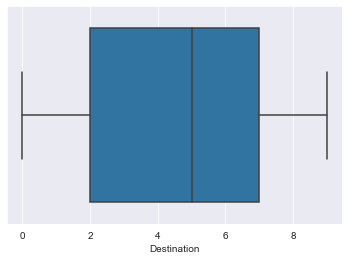

In [79]:
sns.boxplot(df['Destination'])

<AxesSubplot:xlabel='Total_Stops'>

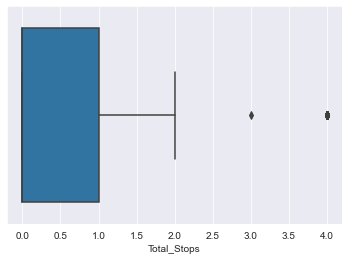

In [80]:
sns.boxplot(df['Total_Stops'])

<AxesSubplot:xlabel='Price'>

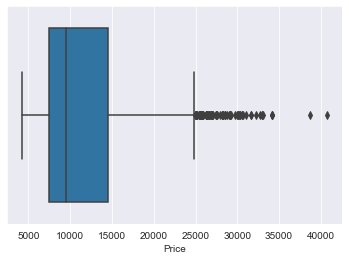

In [81]:
sns.boxplot(df['Price'])

In [82]:
df.shape

(3542, 12)

# ZScore:

In [83]:
from scipy.stats import zscore

In [84]:
Z = zscore(df)

In [85]:
z_abs_score = np.abs(Z)

In [86]:
#taking 3 as thresold value
df1 = df[(z_abs_score < 3).all(axis=1)]

In [87]:
df1.shape

(3434, 12)

In [88]:
df.shape

(3542, 12)

# Percenatge of Dataloss

In [89]:
data_loss = (3542-3434)/3542*100
data_loss

3.0491247882552233

## 3.04% data loss is acceptable

In [90]:
dropindx = df.index.difference(df1.index)

In [91]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [92]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,2,7,7,9,4,7320.0,15,0,17,0,2,0
1,1,7,7,8,4,7320.0,18,0,20,0,2,0
2,1,7,7,8,4,7320.0,7,0,9,5,2,5
3,6,7,7,8,4,7320.0,21,50,23,55,2,5
5,6,7,7,8,4,7320.0,5,45,7,55,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,1,4,2,9,0,10907.0,8,40,17,20,8,40
3538,1,4,2,9,0,10907.0,14,15,23,0,8,45
3539,1,4,2,9,0,10907.0,6,20,15,15,8,55
3540,1,4,2,9,0,10907.0,4,50,13,55,9,5


# Skewness:

In [93]:
df.skew()

Airline              0.444592
Source              -0.016259
Destination         -0.029733
Meal_availability   -0.636460
Total_Stops          1.478437
Price                0.988217
Dep_hour            -0.025567
Dep_min             -0.025807
Arrival_hour        -0.373326
Arrival_min         -0.094412
Duration_hours       1.011714
Duration_min         0.139269
dtype: float64

# Plotting Skewness:

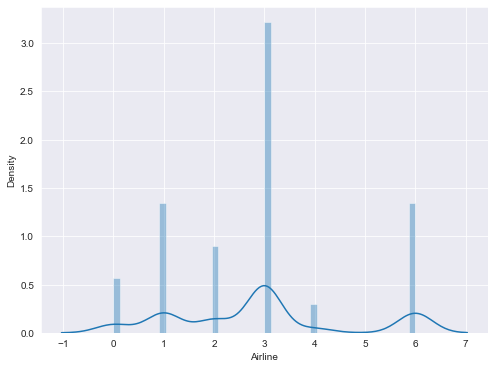

In [94]:
plt.figure(figsize=(8,6))
sns.distplot(df['Airline'])
plt.show()

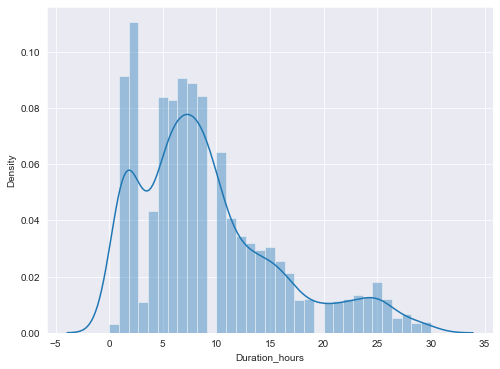

In [95]:
plt.figure(figsize=(8,6))
sns.distplot(df['Duration_hours'])
plt.show()

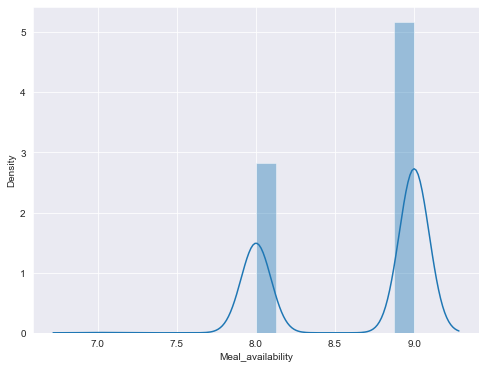

In [96]:
plt.figure(figsize=(8,6))
sns.distplot(df['Meal_availability'])
plt.show()

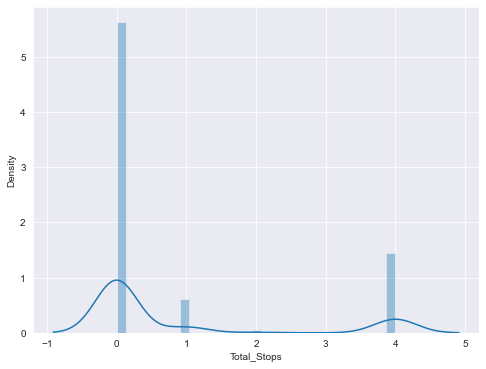

In [97]:
plt.figure(figsize=(8,6))
sns.distplot(df['Total_Stops'])
plt.show()

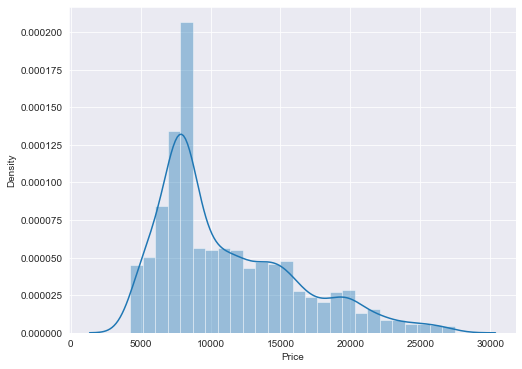

In [98]:
plt.figure(figsize=(8,6))
sns.distplot(df['Price'])
plt.show()

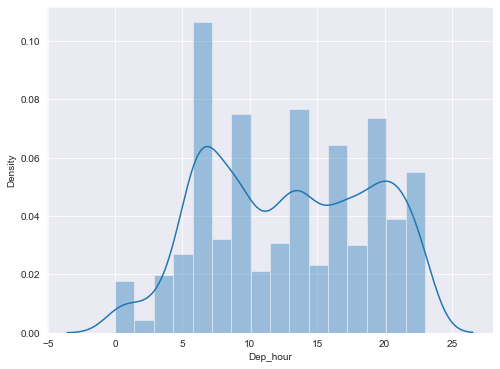

In [99]:
plt.figure(figsize=(8,6))
sns.distplot(df['Dep_hour'])
plt.show()

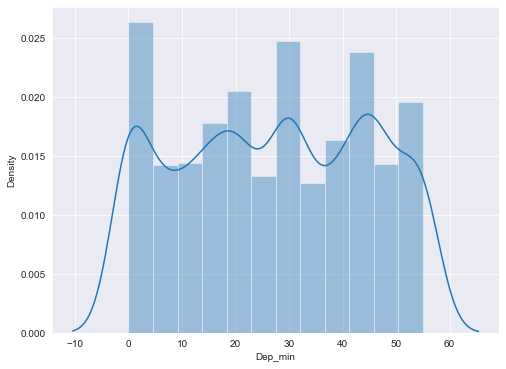

In [100]:
plt.figure(figsize=(8,6))
sns.distplot(df['Dep_min'])
plt.show()

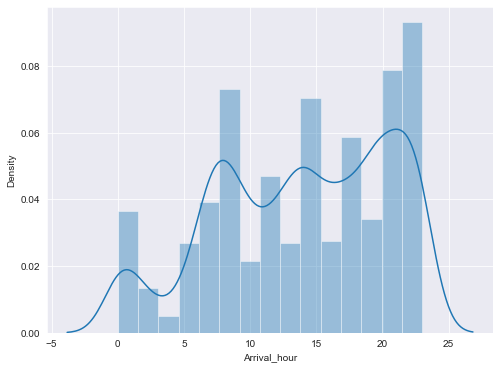

In [101]:
plt.figure(figsize=(8,6))
sns.distplot(df['Arrival_hour'])
plt.show()

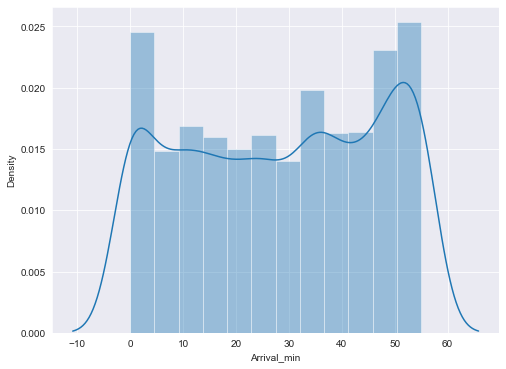

In [102]:
plt.figure(figsize=(8,6))
sns.distplot(df['Arrival_min'])
plt.show()

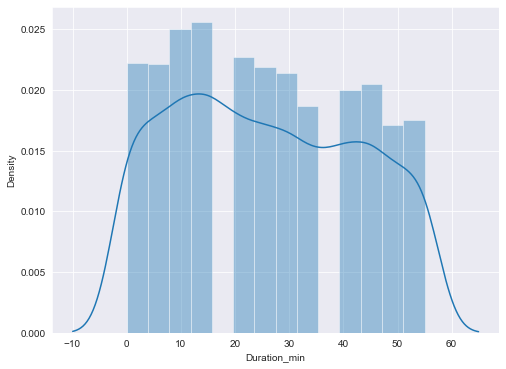

In [103]:
plt.figure(figsize=(8,6))
sns.distplot(df['Duration_min'])
plt.show()

# Observations:-

1.From the distribution plot we can observe the columns are somewhat distributed normally as they have no proper bell shape curve.

2.The columns like "Duration_hour", "Total_Stops" and "Price" are skewed to right as the mean value in these columns are much greater than the median(50%).

3.Also the data in the column Arrival_Hour and  Arrival_min skewed to left since the mean values is less than the median.

4.Since there is presence of skewness in the data, we need to remove skewness in the numerical columns to overcome with any kind of data biasness.

# Reducing skewness using PowerTransformer

In [104]:
from sklearn.preprocessing import PowerTransformer

In [105]:
PT = PowerTransformer(method='yeo-johnson', standardize=True)

In [106]:
df2 = df[['Airline','Duration_hours']]

In [107]:
TF = PT.fit_transform(df2)

In [108]:
transformed = pd.DataFrame(TF, columns=df2.columns) #to convert numpy array back into dataframe

In [109]:
transformed.skew()

Airline          -0.046464
Duration_hours   -0.038713
dtype: float64

In [110]:
transformed.index = df.index

In [111]:
df[['Airline','Duration_hours']] = transformed[['Airline','Duration_hours']]

In [112]:
df

,Airline,Source,Destination,Meal_availability,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_min
0,-0.407587,7,7,9,4,7320.0,15,0,17,0,-1.336511,0
1,-1.091739,7,7,8,4,7320.0,18,0,20,0,-1.336511,0
2,-1.091739,7,7,8,4,7320.0,7,0,9,5,-1.336511,5
3,1.611626,7,7,8,4,7320.0,21,50,23,55,-1.336511,5
5,1.611626,7,7,8,4,7320.0,5,45,7,55,-1.336511,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3537,-1.091739,4,2,9,0,10907.0,8,40,17,20,0.052897,40
3538,-1.091739,4,2,9,0,10907.0,14,15,23,0,0.052897,45
3539,-1.091739,4,2,9,0,10907.0,6,20,15,15,0.052897,55
3540,-1.091739,4,2,9,0,10907.0,4,50,13,55,0.208284,5


# Standard Scaler Method:

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
X = df.drop(columns = ['Price'],axis=1)
y = df['Price']

In [116]:
X.shape, y.shape

((3434, 11), (3434,))

In [117]:
scaler = StandardScaler()
std_X = scaler.fit_transform(X)

In [118]:
std_X

array([[-0.40758747,  1.19032946,  0.85117698, ..., -1.55198729,
        -1.33651137, -1.52769976],
       [-1.09173856,  1.19032946,  0.85117698, ..., -1.55198729,
        -1.33651137, -1.52769976],
       [-1.09173856,  1.19032946,  0.85117698, ..., -1.28047451,
        -1.33651137, -1.23211034],
       ...,
       [-1.09173856,  0.02743007, -0.92288332, ..., -0.73744895,
         0.05289701,  1.72378383],
       [-1.09173856,  0.02743007, -0.92288332, ...,  1.43465328,
         0.2082837 , -1.23211034],
       [-1.09173856,  0.02743007, -0.92288332, ...,  0.07708939,
        -0.11582731,  1.13260499]])

# Principle Component Analysis:

In [119]:
from sklearn.decomposition import PCA
pca = PCA()

In [120]:
component = pca.fit_transform(std_X)

In [121]:
pca.fit(std_X)

PCA()

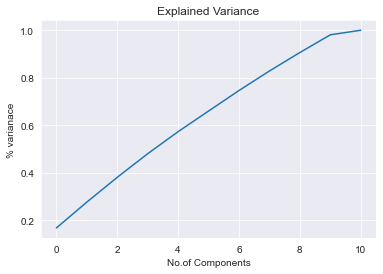

In [122]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [123]:
final = PCA()
final_data = final.fit_transform(std_X)
pca_X = pd.DataFrame(final_data)
pca_X

,0,1,2,3,4,5,6,7,8,9,10
0,2.571881,0.464791,0.376436,0.204160,2.087977,-1.022673,1.639321,0.006470,-0.793386,-0.611372,-0.398948
1,1.688298,0.892302,0.257463,0.966573,1.890512,-0.814551,2.883528,-0.389261,-1.492707,0.300396,0.364472
2,1.844718,0.576037,-0.017485,0.206132,1.420296,-1.977717,2.522840,-0.206686,0.152691,1.354433,0.360251
3,1.622394,-0.487514,0.787833,3.211033,-1.513628,-0.635275,0.726841,-0.963773,-1.780038,-0.602706,0.183942
4,1.854740,-0.916154,0.420167,2.036330,-1.771499,-2.353643,0.412140,-0.734184,0.715539,0.838002,0.200074
...,...,...,...,...,...,...,...,...,...,...,...
3429,-0.103207,0.984071,-1.388203,-0.569586,0.303569,0.579114,-1.169735,0.107580,0.142801,0.391925,-0.033966
3430,-0.258079,0.838668,-1.514428,-1.083691,1.573638,1.254931,-0.107197,-0.418263,-0.637570,-0.438625,-0.018055
3431,-0.169219,0.475528,-1.840397,-1.693672,0.566268,0.472731,-0.618857,-0.302301,0.372334,0.464648,-0.064340
3432,-0.015623,1.166249,-0.844466,0.558669,-1.068125,-0.599011,-1.262961,2.068165,0.694485,0.283381,-0.108961


# Model Building:

In [161]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7893036984955932  on Random_state  13


## Spliting Data

In [190]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.30, random_state=13)

## Ridge

In [191]:
R = Ridge()
R.fit(X_train,y_train)

Ridge()

In [192]:
R.score(X_train,y_train)

0.4724534925828735

In [193]:
pred_r = R.predict(X_test)

In [194]:
print('R2_SCORE:',r2_score(y_test,pred_r))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_r))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_r)))

R2_SCORE: 0.5140250511578743
Mean_Squared_Error: 11865832.874081917
Root Mean_Squared_Error: 3444.681824796293


## DecisionTreeRegressor

In [195]:
DTR = DecisionTreeRegressor()
DTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [196]:
DTR.score(X_train,y_train)

0.9998438735359387

In [197]:
pred_dtr = DTR.predict(X_test)

In [198]:
print('R2_SCORE:',r2_score(y_test,pred_dtr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_dtr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_SCORE: 0.5314864621776402
Mean_Squared_Error: 11439485.414403493
Root Mean_Squared_Error: 3382.2308339915967


## RandomForestRegressor

In [199]:
RFR = RandomForestRegressor()
RFR.fit(X_train,y_train)

RandomForestRegressor()

In [200]:
RFR.score(X_train,y_train)

0.9633196037847301

In [201]:
pred_rfr = RFR.predict(X_test)

In [202]:
print('R2_SCORE:',r2_score(y_test,pred_rfr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_rfr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_SCORE: 0.7884409653353734
Mean_Squared_Error: 5165542.286312516
Root Mean_Squared_Error: 2272.7829386706762


## XGBRegressor

In [203]:
XGR = XGBRegressor()
XGR.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [204]:
XGR.score(X_train,y_train)

0.986268507875159

In [205]:
pred_xgr = XGR.predict(X_test)

In [206]:
print('R2_SCORE:',r2_score(y_test,pred_xgr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_xgr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_xgr)))

R2_SCORE: 0.7794040163391258
Mean_Squared_Error: 5386193.426328194
Root Mean_Squared_Error: 2320.8174047796597


## GradientBoostingRegressor

In [207]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [208]:
gbr.score(X_train,y_train)

0.7178318231590766

In [209]:
pred_gbr = gbr.predict(X_test)

In [210]:
print('R2_SCORE:',r2_score(y_test,pred_gbr))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_gbr))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_SCORE: 0.695432882971171
Mean_Squared_Error: 7436479.016491574
Root Mean_Squared_Error: 2726.9908354249333


## KNeighborsRegressor

In [211]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [212]:
knn.score(X_train,y_train)

0.4741782472130279

In [213]:
pred_knn = knn.predict(X_test)

In [214]:
print('R2_SCORE:',r2_score(y_test,pred_knn))
print('Mean_Squared_Error:',mean_squared_error(y_test,pred_knn))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_SCORE: 0.16034683723912435
Mean_Squared_Error: 20501435.568341415
Root Mean_Squared_Error: 4527.851098296124


### From the above created models, Random Tree Regressor algorithm has high R2 score and less RMSE value. So, we can conclude that "Random Tree Regressor" as the best fitting model. Let's try to increase our model score by tuning the best model using different types of hyper parameters.

# Hyper Parameter Tuning:

In [219]:
params = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],'max_features':  ['auto', 'sqrt'], 'max_depth':  [int(x) for x in np.linspace(5, 30, num = 6)],'min_samples_split':[2, 5, 10, 15, 100],'min_samples_leaf': [1, 2, 5, 10]}

In [220]:
rf = RandomizedSearchCV(estimator = RFR, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [221]:
rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [222]:
rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [223]:
final_pred = rf.predict(X_test)

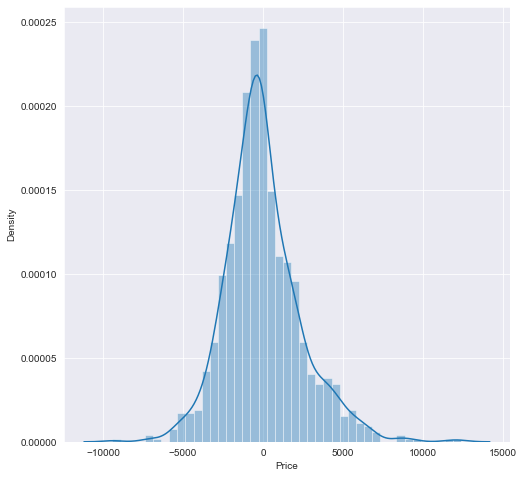

In [224]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-final_pred)
plt.show()

In [225]:
print('R2_SCORE:',r2_score(y_test,final_pred))
print('Mean_Squared_Error:',mean_squared_error(y_test,final_pred))
print('Root Mean_Squared_Error:',np.sqrt(mean_squared_error(y_test,final_pred)))

R2_SCORE: 0.7687230740626745
Mean_Squared_Error: 5646985.214654017
Root Mean_Squared_Error: 2376.338615318536


## We have successfully incorporated the hyper parameter tuning using best parameters of RandomTreeRegressor and the R2 score of the model has been increased after hyperparameter tuning and received the R2 score as 76.87% which is very good.

# Saving the Final model

In [226]:
import joblib
joblib.dump(rf,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

# Loading the saved model and predicting Flight Ticket Price

In [227]:
Model = joblib.load("Flight_Price_Prediction.pkl")

In [228]:
#Prediction
prediction = Model.predict(X_test)
prediction

array([ 9285.08121368, 16232.21775841,  8005.06310905, ...,
       17598.58592479, 13872.93446282, 11253.05921516])

### Predicted Price of the flight tickets.

# Creating DataFrame for the Predicted values VS  Actual Values

In [230]:
Predicted_Flight_Price = pd.DataFrame([Model.predict(X_test)[:],y_test[:]],["Predicted","Actual"])
Predicted_Flight_Price

,0,1,2,3,4,5,6,7,8,9,...,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030
Predicted,9285.081214,16232.217758,8005.063109,8466.134743,11951.533759,7484.728073,10134.9801,16373.369851,13960.117579,9847.276633,...,16347.73412,18900.179064,7902.333148,8197.254648,9587.331473,9721.183569,8579.514801,17598.585925,13872.934463,11253.059215
Actual,8160.000000,13112.000000,5838.000000,8463.000000,14107.000000,7308.000000,10179.0000,18418.000000,10266.000000,11644.000000,...,14028.00000,25024.000000,8148.000000,8148.000000,8685.000000,14421.000000,8223.000000,16908.000000,14568.000000,8714.000000
